In [1]:
import pickle

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
%matplotlib inline
import pandas as pd

In [3]:
import os, glob
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
from IPython.display import display, HTML, Image

In [5]:
data =pd.read_csv('15_PCc_02_LHS_500_54854_01_s1_G.csv')
#data5k =pd.read_csv(r'F:\ML4ChemcialReactions\chemical5K\10_PC_02_LHS_5000_54854_01_s1_G.csv')

In [6]:
### Remove the space from the column names
data.columns =[col.strip() for col in data.columns]
#data5k.columns =[col.strip() for col in data5k.columns]


In [51]:
import plotly
import plotly.express as px

# Determing the firstline


<li> The zones basically based on occurance of the two minerals in the chemical systems <br>
  <li> Portlandite </li>
  <li> Portlandite </li>
</li>

The CSH solid solution always is presented in the chemical system. <br>
So we do not conisered this mineral when we draw the stability daigram


In [7]:
data.columns

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water'],
      dtype='object')

In [8]:
data.describe().T

count       mean        std           min           25%  \
T            500.0  25.000000   0.000000  2.500000e+01  2.500000e+01   
CaO          500.0   0.949959   0.491187  1.028776e-01  5.258247e-01   
SiO2         500.0   0.450007   0.144483  2.005553e-01  3.251447e-01   
CO2          500.0   0.480541   0.277124  2.915118e-03  2.406699e-01   
H2O          500.0   0.100001   0.028899  5.003409e-02  7.506340e-02   
pH           500.0  10.074574   3.018017  4.475974e+00  9.791969e+00   
MassWater    500.0   0.087367   0.034392  1.127303e-02  5.985450e-02   
Ca_aq        500.0   0.001945   0.002414  3.878646e-05  2.067107e-04   
Si_aq        500.0   0.000113   0.000147  3.488732e-07  2.923485e-06   
C_aq         500.0   0.072231   0.161576  7.412758e-08  4.643021e-07   
O_aq         500.0   0.148576   0.327651  1.422928e-04  8.912868e-04   
H_aq         500.0   0.003883   0.004834  7.549028e-05  3.863126e-04   
Ca_s         500.0   0.948014   0.492335  9.873112e-02  5.232821e-01   
Si_s         500.0   0.449895   0.144469  2.005046e-01  3.251429e-01   
C_s          500.0   0.408310   0.253561  2.914755e-03  1.946488e-01   
O_s          500.0   3.548558   1.332898  7.274364e-01  2.461679e+00   
H_s          500.0   1.768267   1.395364  0.000000e+00  2.033668e-01   
Portlandite  500.0   0.141017   0.269389  0.000000e+00  0.000000e+00   
AmorfSi      500.0   0.141266   0.209595  0.000000e+00  0.000000e+00   
Calcite      500.0   0.408310   0.253561  2.914755e-03  1.946488e-01   
mCSHQ        500.0   0.054289   0.041062  0.000000e+00  8.397707e-03   
Ca_ss        500.0   0.398687   0.320563  0.000000e+00  4.524903e-02   
Si_ss        500.0   0.308628   0.223814  0.000000e+00  6.704584e-02   
H2O_ss       500.0   0.743117   0.574920  0.000000e+00  1.016834e-01   
V_s          500.0  47.732027  18.374597  9.888236e+00  3.260545e+01   
Gel_water    500.0   0.299327   0.239640  0.000000e+00  3.474144e-02   

                      50%        75%        max  
T            2.500000e+01  25.000000  25.000000  
CaO          9.498891e-01   1.373675   1.798676  
SiO2         4.499859e-01   0.575014   0.699759  
CO2          4.805257e-01   0.720359   0.958177  
H2O          9.995587e-02   0.124939   0.149836  
pH           1.169534e+01  12.472610  12.472610  
MassWater    8.777784e-02   0.112125   0.177023  
Ca_aq        1.014888e-03   0.002218   0.010506  
Si_aq        1.984171e-05   0.000205   0.000582  
C_aq         8.159908e-07   0.000003   0.783830  
O_aq         2.075927e-03   0.004785   1.581734  
H_aq         2.020478e-03   0.004428   0.021018  
Ca_s         9.497651e-01   1.372723   1.798316  
Si_s         4.499143e-01   0.574715   0.699518  
C_s          3.805558e-01   0.593049   0.958175  
O_s          3.602048e+00   4.629195   6.212454  
H_s          1.858188e+00   2.927160   4.834697  
Portlandite  0.000000e+00   0.163801   1.421246  
AmorfSi      0.000000e+00   0.271130   0.695664  
Calcite      3.805558e-01   0.593049   0.958175  
mCSHQ        5.676722e-02   0.086571   0.140342  
Ca_ss        4.090198e-01   0.641619   1.119359  
Si_ss        3.330785e-01   0.482965   0.698207  
H2O_ss       7.731743e-01   1.182660   1.984499  
V_s          4.783976e+01  63.545772  84.108690  
Gel_water    3.111551e-01   0.477772   0.847300

In [9]:
pureMinerals = ['Portlandite', 'AmorfSi', 'Calcite']   # 'Gypsum',

In [10]:
data.columns[:10]

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq'],
      dtype='object')

In [20]:
data.columns

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water'],
      dtype='object')

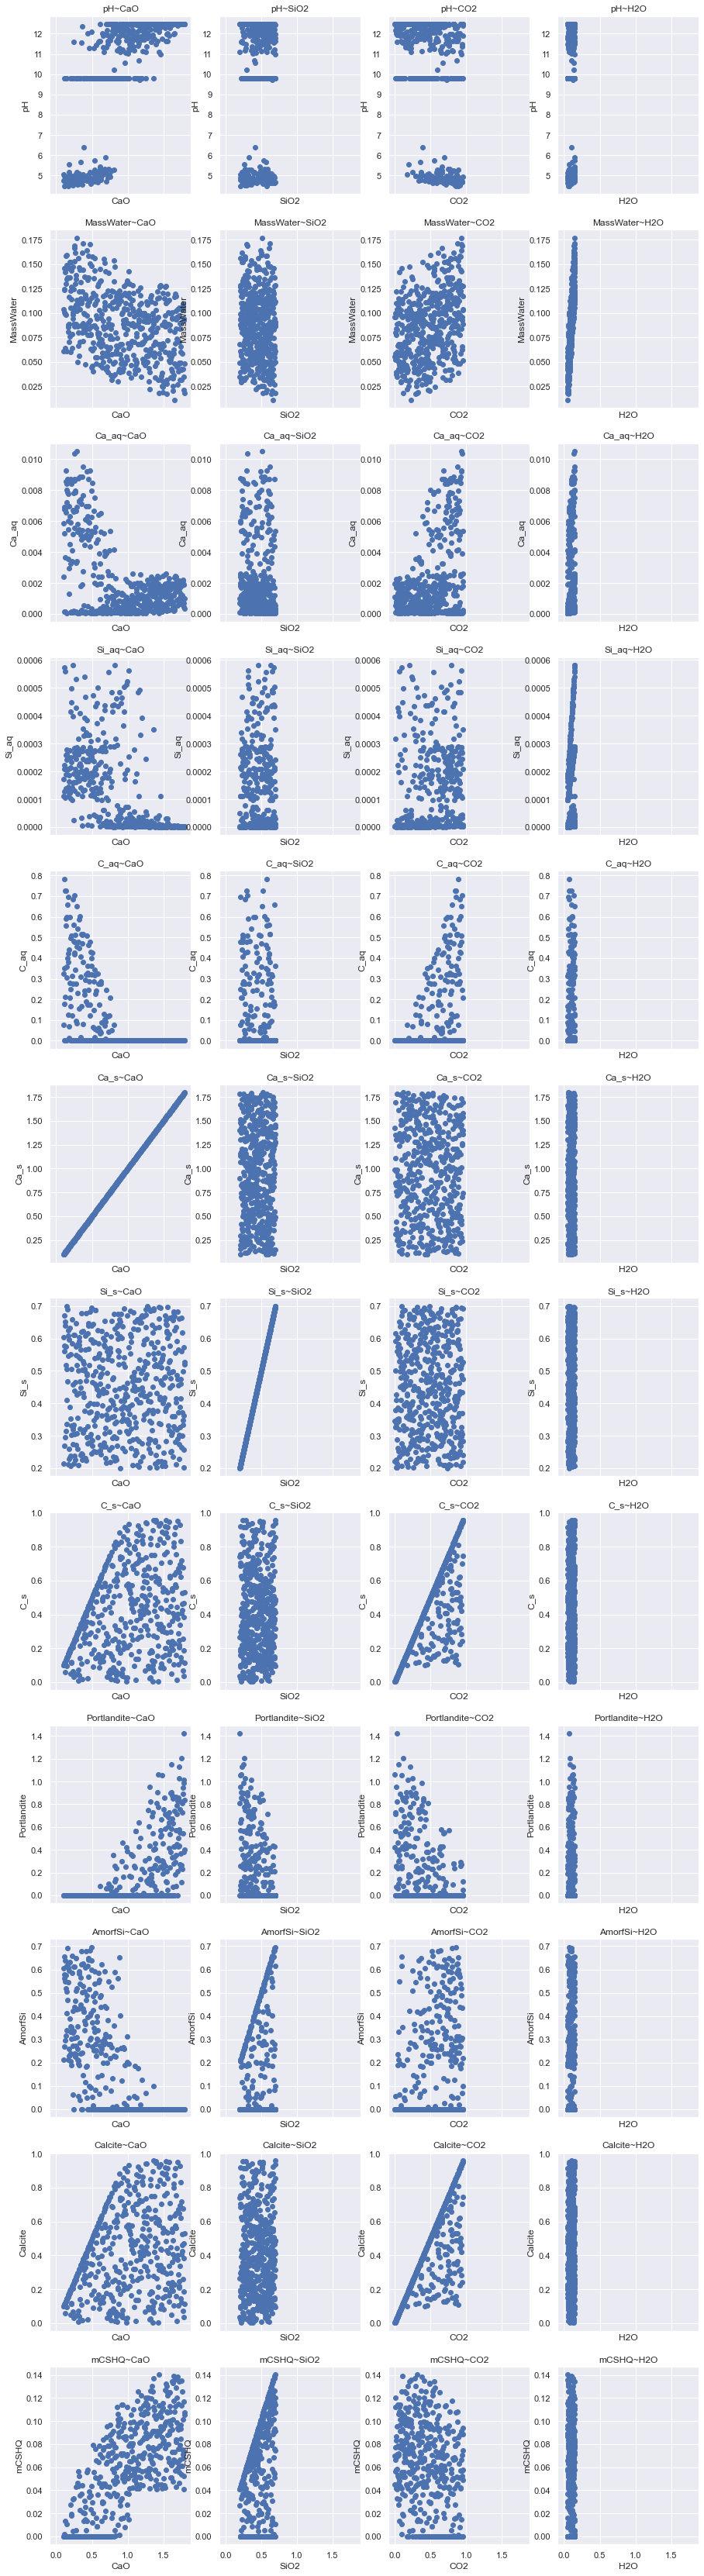

In [34]:
inputCols= ['CaO', 'SiO2', 'CO2','H2O']
outputCols = ['pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'Ca_s', 'Si_s', 'C_s', 'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ']
n1 = len(inputCols)
n2 = len(outputCols)
fig,ax=plt.subplots(n2,n1,figsize=(15,60),sharex=True)

for i,coli in enumerate(outputCols):
    for j,colj in enumerate(inputCols):
        ax[i,j].plot(data[colj],data[coli],'bo')
        ax[i,j].set_title(coli +'~' + colj)
        ax[i,j].set_xlabel(colj)
        ax[i,j].set_ylabel(coli)


In [55]:
conditions = [
    (data['pH']<=9.7),
    (data['pH']>9.7) & (data['pH']<9.8),
    (data['pH']>=9.8) & (data['pH']<12.45),
    (data['pH']>=12.45)
    ]
values = ['1', '2', '3', '4']
data['group'] = np.select(conditions, values)

In [56]:

fig =px.scatter_ternary(data, a="CaO", b="SiO2", c="CO2",color='group')
fig.show()

Text(0, 0.5, 'CaO')

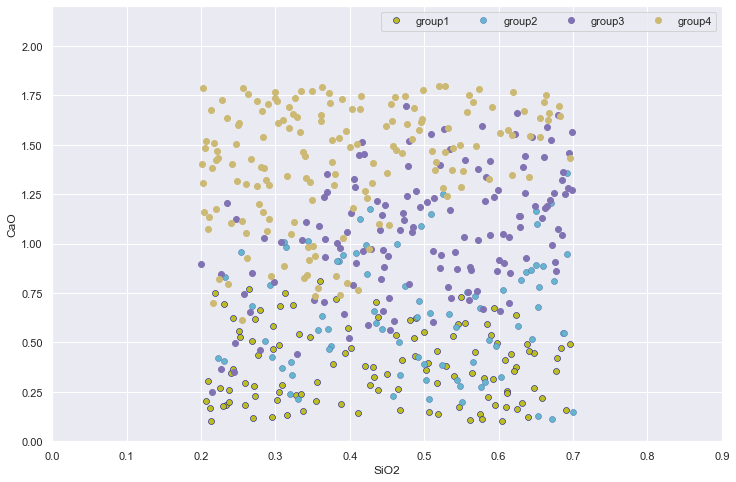

In [47]:
# Plot the three groups

fig, ax = plt.subplots(figsize=(12,8))
#x1 = np.linspace(0.0, 0.9, 30)
#y1 = 0 + group3_upper*x1
#x2 = np.linspace(0.0, 0.9, 30)
#y2 = 0 + group1_low*x2

ax.plot(group1['SiO2'].values, group1['CaO'].values, 'bo', markerfacecolor='tab:olive', markeredgecolor='darkblue', markeredgewidth=0.5, label='group1')
ax.plot(group2['SiO2'].values, group2['CaO'].values, 'bo', markerfacecolor='c', markeredgecolor='b', markeredgewidth=0.5, label='group2')
ax.plot(group3['SiO2'].values, group3['CaO'].values, 'bo', markerfacecolor='m', markeredgecolor ='m', markeredgewidth=1, label='group3')
ax.plot(group4['SiO2'].values, group4['CaO'].values, 'bo', markerfacecolor='y', markeredgecolor ='y', markeredgewidth=1, label='group4')

#ax.plot(x1, y1, 'r-', lw=2, label ='CaO/SiO2 = '+str(group3_upper)[:5])
#ax.plot(x2, y2, 'y-', lw=3, label ='CaO/SiO2 = '+str(group1_low)[:5])
ax.legend(loc='best', ncol=5)           
ax.set_xlim(0, 0.9)
ax.set_ylim(0, 2.2)
#ax.text(0.1, 1.25, 'no AmorfSi, with Portlandite', fontsize=20, color='brown')
#ax.text(0.5, 0.62, 'no AmorfSi or Portlandite', fontsize=20, color='k')
#ax.text(0.35, 0.02, 'with AmorfSi no Portlandite', fontsize=20, color='k')
ax.set_xlabel('SiO2')
ax.set_ylabel('CaO')

C:\Users\Cyang.MDM-MOD1-D1\AppData\Local\Temp\ipykernel_16328\2705994161.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax =plt.subplots(figsize=(12,6))


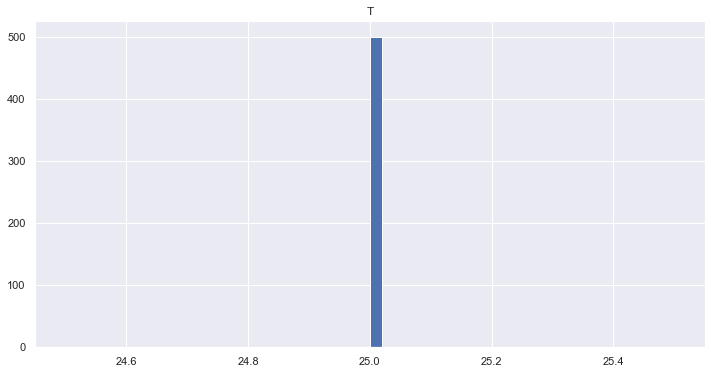

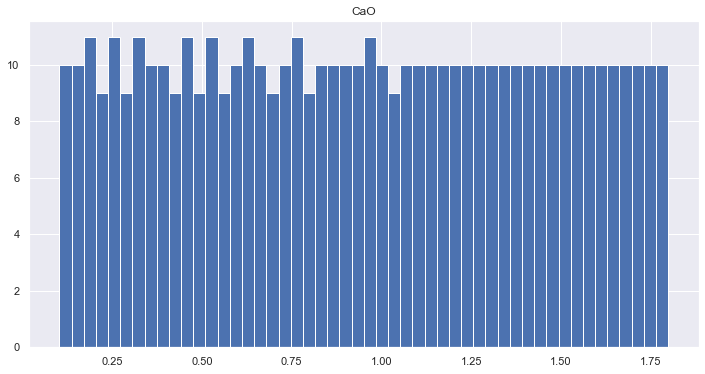

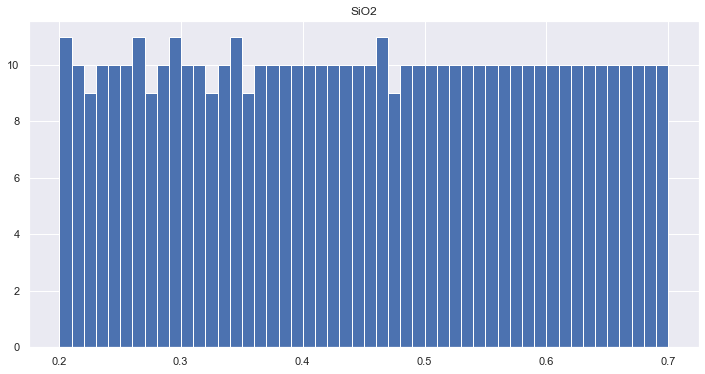

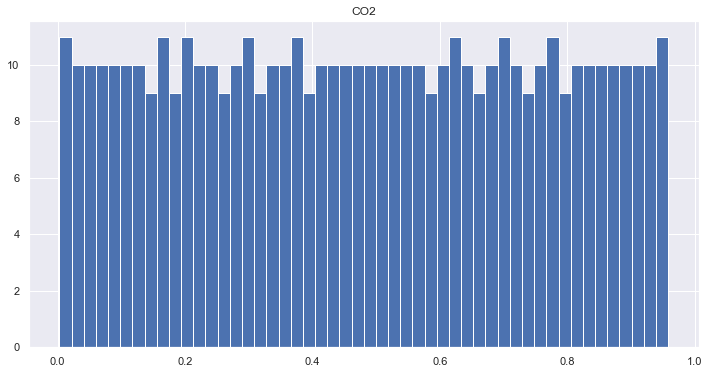

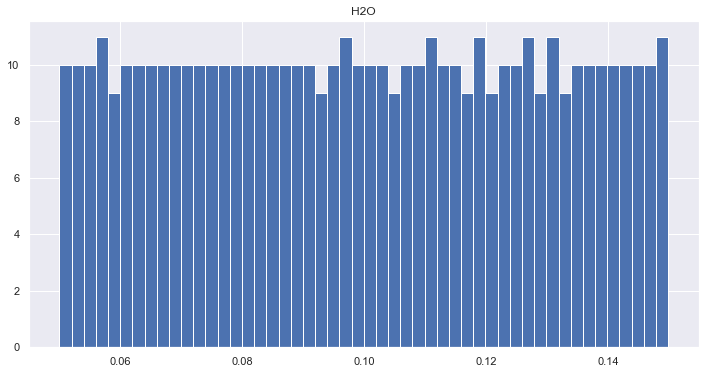

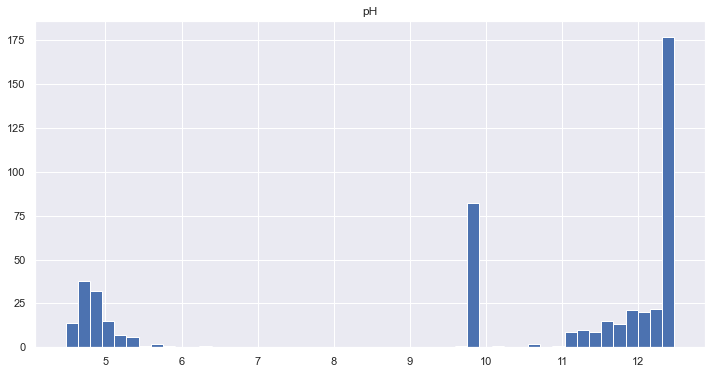

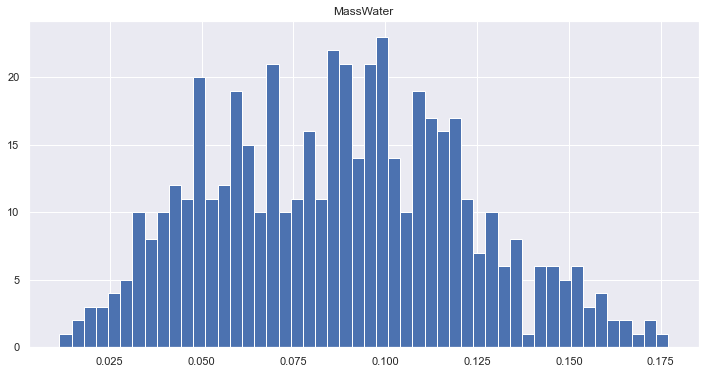

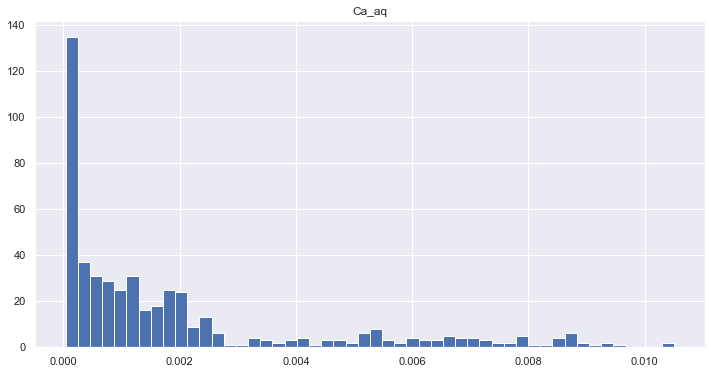

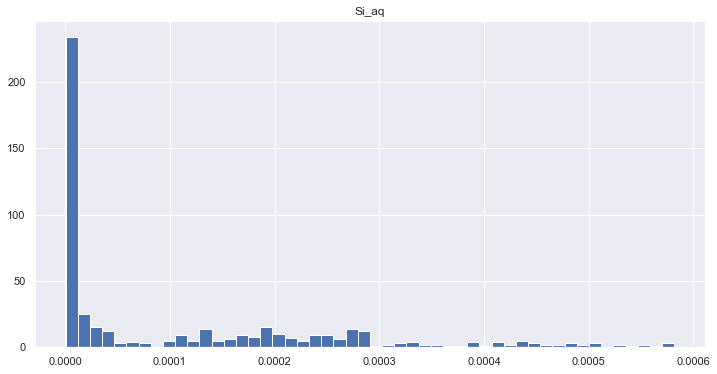

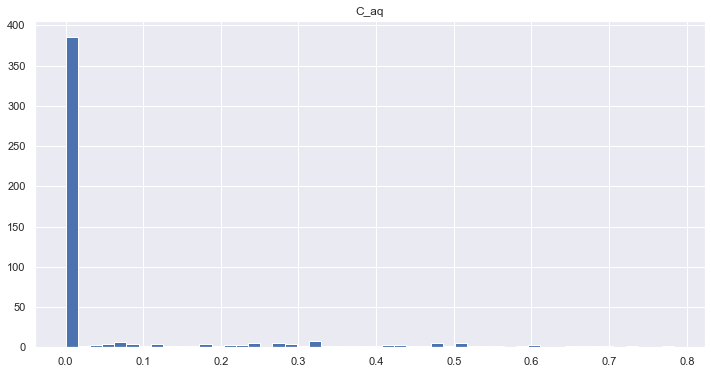

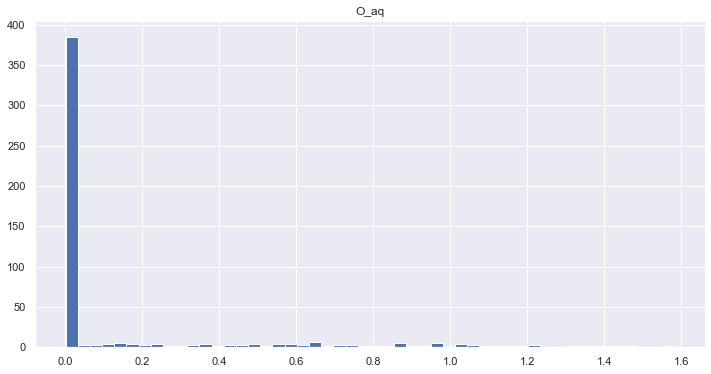

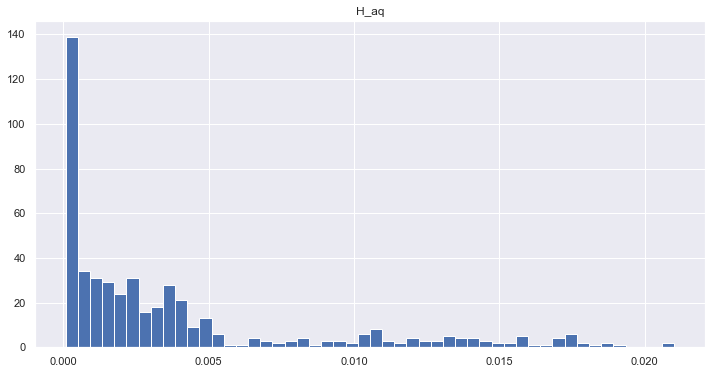

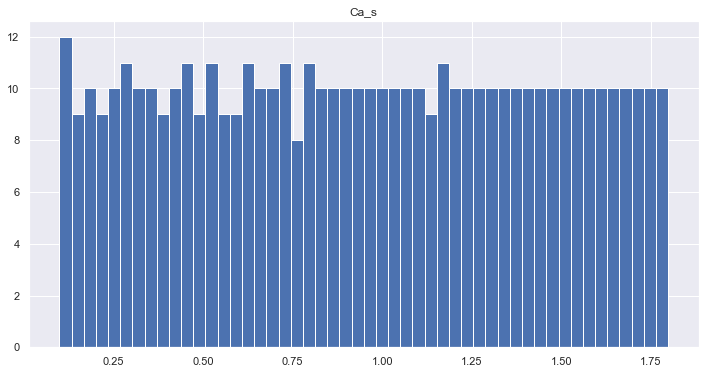

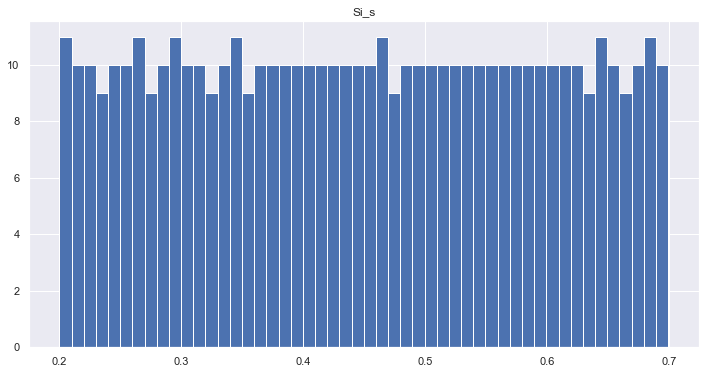

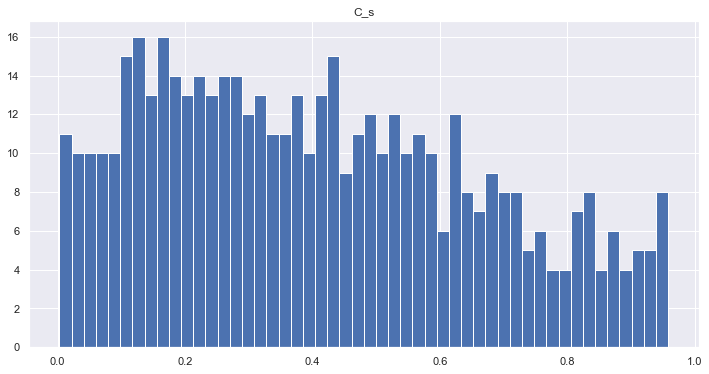

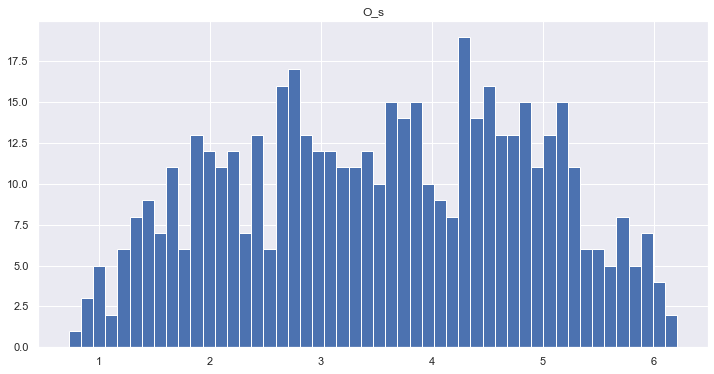

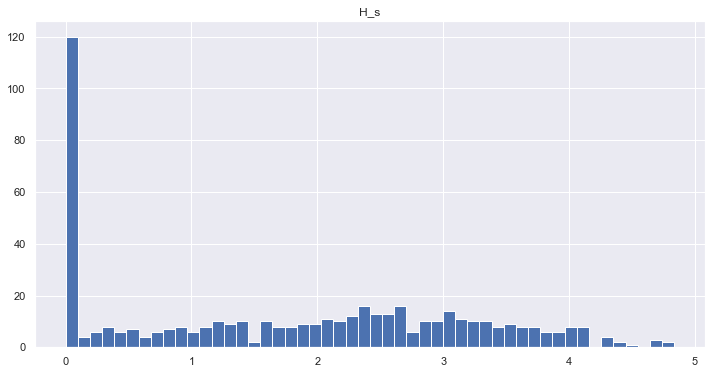

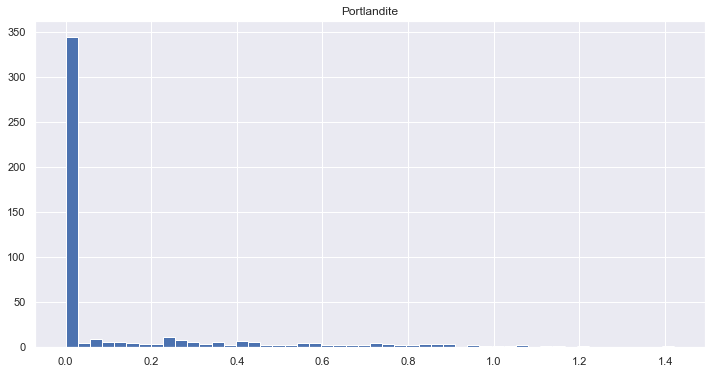

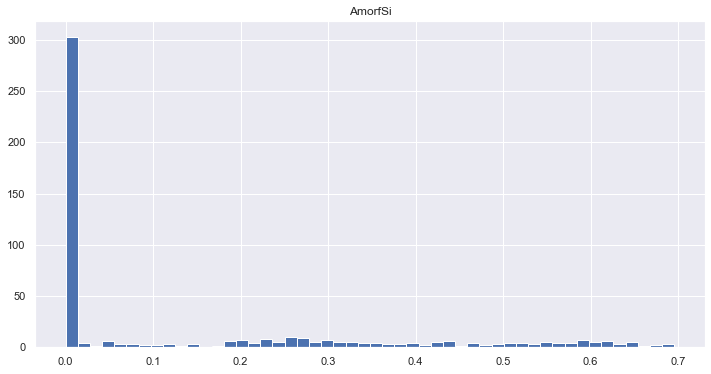

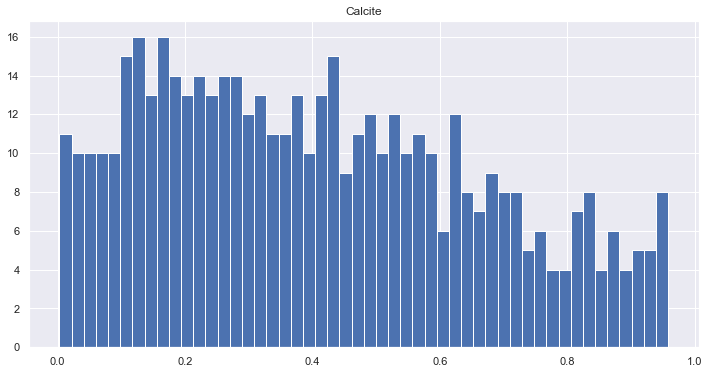

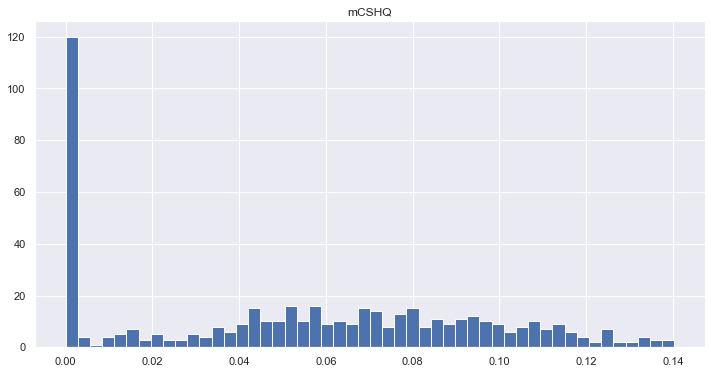

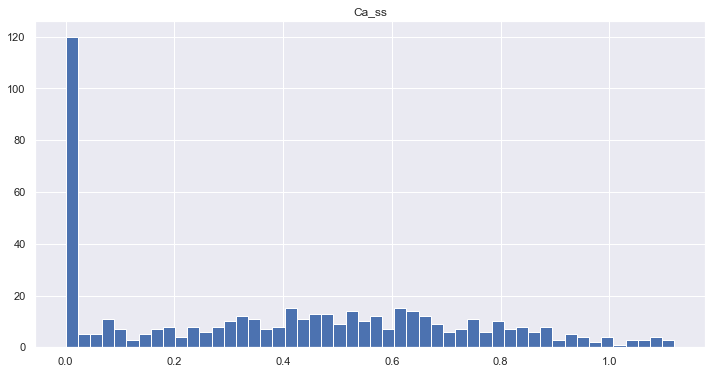

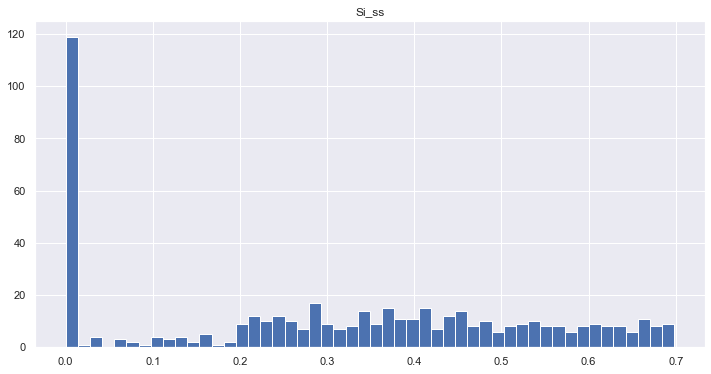

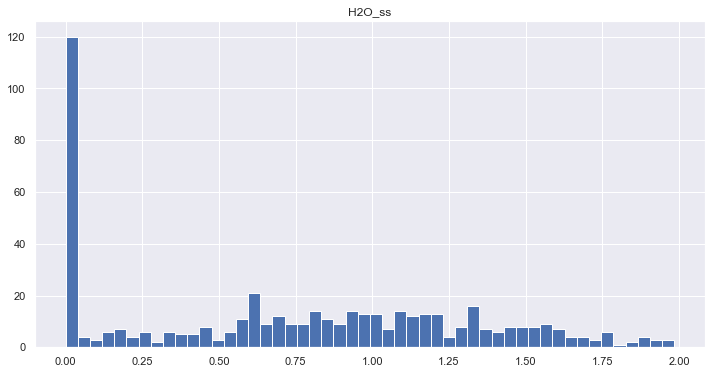

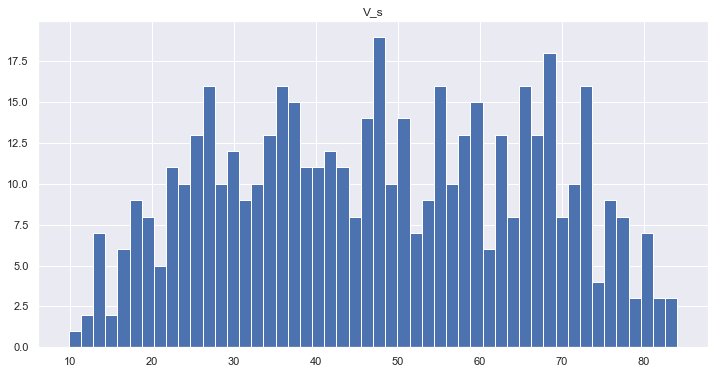

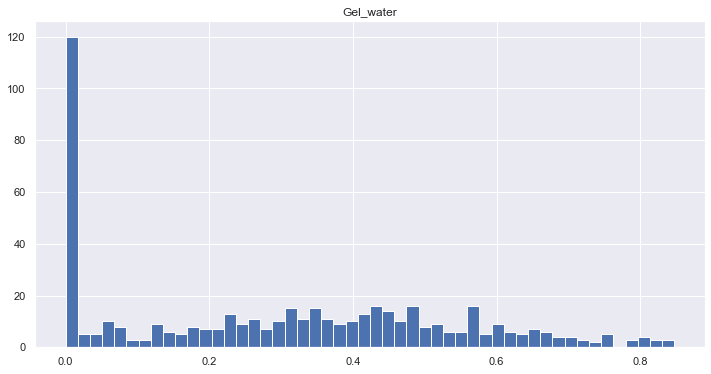

In [11]:
for col in data.columns:
    fig,ax =plt.subplots(figsize=(12,6))
    data[col].hist(ax=ax,bins=50)
    ax.set_title(col)

In [70]:
data['AltoSi'] = data['Al2O3']/data['SiO2']
data['CatoCO2'] = data['CaO']/data['CO2']


In [79]:
data['CatoSi'] =data['CaO']/data['SiO2']

In [80]:
data.columns

Index(['T', 'CaO', 'SiO2', 'Al2O3', 'SO3', 'K2O', 'CO2', 'H2O', 'pH',
       'MassWater', 'Ca_aq', 'Si_aq', 'Al_aq', 'S_aq', 'K_aq', 'C_aq', 'O_aq',
       'H_aq', 'Ca_s', 'Si_s', 'Al_s', 'S_s', 'K_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Gibbsite', 'Katoite', 'Monosulfate',
       'Gypsum', 'Ettringite', 'Straetlingite', 'Chabazite', 'Calcite',
       'Hemicarbonate', 'Monocarbonate', 'Thaumasite', 'mETss', 'Al_ET_ss',
       'Ca_ET_ss', 'S_ET_ss', 'C_ET_ss', 'H2O_ET_ss', 'mCSHQ', 'Ca_ss',
       'Si_ss', 'K_ss', 'H2O_ss', 'V_s', 'Gel_water', 'AltoSi', 'CatoCO2',
       'CatoSi'],
      dtype='object')

In [86]:
data[data['CatoSi']>=1.634].describe().T

count          mean           std           min        25%  \
T              49318.0  2.500000e+01  0.000000e+00  2.500000e+01  25.000000   
CaO            49318.0  1.153087e+00  1.428930e-01  9.000151e-01   1.030114   
SiO2           49318.0  4.481499e-01  8.573879e-02  3.000033e-01   0.373979   
Al2O3          49318.0  5.000871e-02  1.154748e-02  3.000080e-02   0.040010   
SO3            49318.0  3.499543e-02  8.658837e-03  2.000021e-02   0.027494   
K2O            49318.0  9.000904e-03  1.732090e-03  6.000068e-03   0.007501   
CO2            49318.0  4.005351e-01  2.306604e-01  1.004178e-03   0.200805   
H2O            49318.0  9.999992e-02  2.887011e-02  5.000040e-02   0.074982   
pH             49318.0  1.264152e+01  6.494421e-01  9.260772e+00  12.568053   
MassWater      49318.0  6.704113e-02  2.991225e-02  8.488139e-08   0.041788   
Ca_aq          49318.0  9.559601e-05  1.245089e-04  9.764647e-11   0.000017   
Si_aq          49318.0  1.492239e-04  3.267533e-04  5.876350e-12   0.000003   
Al_aq          49318.0  3.839626e-05  4.846831e-05  1.662557e-11   0.000002   
S_aq           49318.0  8.073986e-04  1.703784e-03  1.248673e-09   0.000024   
K_aq           49318.0  7.335270e-03  3.504012e-03  1.618087e-08   0.004733   
C_aq           49318.0  1.399263e-05  1.936451e-05  3.377748e-12   0.000002   
O_aq           49318.0  9.474071e-03  6.497383e-03  2.021040e-06   0.005598   
H_aq           49318.0  5.805230e-03  3.726558e-03  1.384471e-08   0.002601   
Ca_s           49318.0  1.152991e+00  1.428626e-01  8.996288e-01   1.030052   
Si_s           49318.0  4.480006e-01  8.569126e-02  2.995695e-01   0.373848   
Al_s           49318.0  9.997902e-02  2.309128e-02  5.982612e-02   0.079989   
S_s            49318.0  3.418803e-02  8.769943e-03  1.066541e-02   0.026723   
K_s            49318.0  1.066654e-02  3.679271e-03  0.000000e+00   0.008126   
C_s            49318.0  4.005211e-01  2.306483e-01  1.004141e-03   0.200802   
O_s            49318.0  4.961095e+00  4.778810e-01  3.350146e+00   4.616241   
H_s            49318.0  3.706388e+00  7.703359e-01  1.056140e+00   3.205913   
Portlandite    49318.0  6.145662e-02  1.210334e-01  0.000000e+00   0.000000   
AmorfSi        49318.0  2.987446e-03  2.049614e-02  0.000000e+00   0.000000   
Gibbsite       49318.0  1.063501e-02  2.928009e-02  0.000000e+00   0.000000   
Katoite        49318.0  1.012633e-04  1.384425e-03  0.000000e+00   0.000000   
Monosulfate    49318.0  5.504317e-04  3.950577e-03  0.000000e+00   0.000000   
Gypsum         49318.0  0.000000e+00  0.000000e+00  0.000000e+00   0.000000   
Ettringite     49318.0  8.252091e-10  1.832596e-07  0.000000e+00   0.000000   
Straetlingite  49318.0  1.400524e-02  2.103888e-02  0.000000e+00   0.000000   
Chabazite      49318.0  2.548947e-03  1.019650e-02  0.000000e+00   0.000000   
Calcite        49318.0  3.682240e-01  2.330314e-01  0.000000e+00   0.163960   
Hemicarbonate  49318.0  8.879145e-04  5.059079e-03  0.000000e+00   0.000000   
Monocarbonate  49318.0  8.879145e-04  5.059079e-03  0.000000e+00   0.000000   
Thaumasite     49318.0  1.133505e-02  1.621966e-02  0.000000e+00   0.000000   
mETss          49318.0  1.011870e-02  8.064619e-03  0.000000e+00   0.000000   
Al_ET_ss       49318.0  1.624242e-02  1.294780e-02  0.000000e+00   0.000000   
Ca_ET_ss       49318.0  4.872726e-02  3.884341e-02  0.000000e+00   0.000000   
S_ET_ss        49318.0  2.230247e-02  1.774168e-02  0.000000e+00   0.000000   
C_ET_ss        49318.0  2.061160e-03  1.771842e-03  0.000000e+00   0.000000   
H2O_ET_ss      49318.0  2.598787e-01  2.071648e-01  0.000000e+00   0.000000   
mCSHQ          49318.0  7.278716e-02  2.070005e-02  0.000000e+00   0.061407   
Ca_ss          49318.0  5.301335e-01  1.866654e-01  0.000000e+00   0.402251   
Si_ss          49318.0  4.094771e-01  9.518480e-02  0.000000e+00   0.342902   
K_ss           49318.0  1.066654e-02  3.679271e-03  0.000000e+00   0.008126   
H2O_ss         49318.0  9.965493e-01  3.065488e-01  0.000000e+00   

In [84]:
data[data['CatoSi']<1.634].describe().T

count          mean        std           min           25%  \
T              682.0  2.500000e+01   0.000000  2.500000e+01  2.500000e+01   
CaO            682.0  9.267891e-01   0.018873  9.000085e-01  9.110978e-01   
SiO2           682.0  5.837910e-01   0.011306  5.539887e-01  5.755374e-01   
Al2O3          682.0  4.937041e-02   0.011512  3.011301e-02  3.914979e-02   
SO3            682.0  3.533020e-02   0.008768  2.000974e-02  2.785104e-02   
K2O            682.0  8.934623e-03   0.001730  6.002181e-03  7.483295e-03   
CO2            682.0  3.979630e-01   0.230323  8.476270e-03  1.952778e-01   
H2O            682.0  1.000135e-01   0.028724  5.014005e-02  7.640698e-02   
pH             682.0  1.172442e+01   0.955506  9.296708e+00  1.056228e+01   
MassWater      682.0  7.188681e-02   0.030610  1.256455e-02  4.706628e-02   
Ca_aq          682.0  2.278654e-05   0.000024  3.206188e-06  1.126563e-05   
Si_aq          682.0  5.530587e-04   0.000576  2.716891e-06  3.877832e-05   
Al_aq          682.0  4.023400e-05   0.000042  1.484068e-07  8.802121e-07   
S_aq           682.0  2.758584e-03   0.002960  8.185800e-06  2.910388e-04   
K_aq           682.0  7.740616e-03   0.005301  9.532070e-04  3.528864e-03   
C_aq           682.0  2.485469e-05   0.000016  6.652378e-08  1.006674e-05   
O_aq           682.0  1.442998e-02   0.012155  1.140804e-03  4.702833e-03   
H_aq           682.0  2.085904e-03   0.001712  6.745657e-05  9.635308e-04   
Ca_s           682.0  9.267663e-01   0.018872  8.998395e-01  9.110888e-01   
Si_s           682.0  5.832379e-01   0.011309  5.534944e-01  5.750146e-01   
Al_s           682.0  9.870059e-02   0.023021  6.020083e-02  7.827682e-02   
S_s            682.0  3.257162e-02   0.009094  1.072319e-02  2.490463e-02   
K_s            682.0  1.012863e-02   0.005411  0.000000e+00  5.304365e-03   
C_s            682.0  3.979381e-01   0.230312  8.476203e-03  1.952693e-01   
O_s            682.0  4.735803e+00   0.183526  4.262973e+00  4.613513e+00   
H_s            682.0  3.191710e+00   0.876149  1.168351e+00  2.452022e+00   
Portlandite    682.0  0.000000e+00   0.000000  0.000000e+00  0.000000e+00   
AmorfSi        682.0  4.661579e-02   0.094399  0.000000e+00  0.000000e+00   
Gibbsite       682.0  2.253683e-02   0.040716  0.000000e+00  0.000000e+00   
Katoite        682.0  0.000000e+00   0.000000  0.000000e+00  0.000000e+00   
Monosulfate    682.0  4.084082e-07   0.000011  0.000000e+00  0.000000e+00   
Gypsum         682.0  0.000000e+00   0.000000  0.000000e+00  0.000000e+00   
Ettringite     682.0  0.000000e+00   0.000000  0.000000e+00  0.000000e+00   
Straetlingite  682.0  1.943291e-02   0.023092  0.000000e+00  0.000000e+00   
Chabazite      682.0  1.538123e-02   0.022176  0.000000e+00  0.000000e+00   
Calcite        682.0  3.693604e-01   0.227620  0.000000e+00  1.585178e-01   
Hemicarbonate  682.0  0.000000e+00   0.000000  0.000000e+00  0.000000e+00   
Monocarbonate  682.0  0.000000e+00   0.000000  0.000000e+00  0.000000e+00   
Thaumasite     682.0  2.689879e-02   0.014256  0.000000e+00  2.047599e-02   
mETss          682.0  2.546597e-03   0.005639  0.000000e+00  0.000000e+00   
Al_ET_ss       682.0  4.084026e-03   0.009044  0.000000e+00  0.000000e+00   
Ca_ET_ss       682.0  1.225208e-02   0.027131  0.000000e+00  0.000000e+00   
S_ET_ss        682.0  5.672416e-03   0.012543  0.000000e+00  0.000000e+00   
C_ET_ss        682.0  4.536219e-04   0.001060  0.000000e+00  0.000000e+00   
H2O_ET_ss      682.0  6.534441e-02   0.144701  0.000000e+00  0.000000e+00   
mCSHQ          682.0  6.395623e-02   0.027691  0.000000e+00  4.325169e-02   
Ca_ss          682.0  4.053075e-01   0.208481  0.000000e+00  2.318332e-01   
Si_ss          682.0  4.287655e-01   0.159278  0.000000e+00  3.435765e-01   
K_ss           682.0  1.012863e-02   0.005411  0.000000e+00  5.304365e-03   
H2O_ss         682.0  8.319885e-01   0.385166  0.000000e+00  5.244867e-01   
V_s            682.0  6.191707e+01   2.320734  5.666938e+01  6.014822e+01   
Gel_water  

In [102]:
(len(df1) +len(df2))

50000

In [103]:
df1.describe().T

count          mean           std           min  \
T              15711.0  2.500000e+01  0.000000e+00  2.500000e+01   
CaO            15711.0  1.225303e+00  1.263319e-01  9.001059e-01   
SiO2           15711.0  4.059762e-01  7.632822e-02  3.000033e-01   
Al2O3          15711.0  4.843973e-02  1.143112e-02  3.000246e-02   
SO3            15711.0  3.479537e-02  8.711300e-03  2.000386e-02   
K2O            15711.0  9.000018e-03  1.742020e-03  6.000662e-03   
CO2            15711.0  1.958310e-01  1.449617e-01  1.004178e-03   
H2O            15711.0  9.983422e-02  2.883393e-02  5.001202e-02   
pH             15711.0  1.305841e+01  1.289363e-01  1.275459e+01   
MassWater      15711.0  6.144929e-02  2.934360e-02  8.488139e-08   
Ca_aq          15711.0  2.038122e-04  1.506231e-04  9.764647e-11   
Si_aq          15711.0  2.222744e-06  9.452144e-07  5.876350e-12   
Al_aq          15711.0  3.162797e-06  5.171020e-06  1.662557e-11   
S_aq           15711.0  2.172115e-05  1.241158e-05  1.248673e-09   
K_aq           15711.0  8.501911e-03  3.147267e-03  1.618087e-08   
C_aq           15711.0  1.354225e-06  7.382884e-07  3.377748e-12   
O_aq           15711.0  8.961929e-03  3.298206e-03  2.021040e-06   
H_aq           15711.0  8.856197e-03  3.266441e-03  1.384471e-08   
Ca_s           15711.0  1.225099e+00  1.263357e-01  8.998167e-01   
Si_s           15711.0  4.059740e-01  7.632837e-02  3.000005e-01   
Al_s           15711.0  9.687630e-02  2.286158e-02  6.000193e-02   
S_s            15711.0  3.477365e-02  8.711100e-03  1.996852e-02   
K_s            15711.0  9.498124e-03  3.150422e-03  3.683374e-03   
C_s            15711.0  1.958297e-01  1.449614e-01  1.004141e-03   
O_s            15711.0  4.836756e+00  4.490647e-01  3.350146e+00   
H_s            15711.0  4.307329e+00  4.927147e-01  2.838365e+00   
Portlandite    15711.0  1.929169e-01  1.436108e-01  2.242114e-06   
AmorfSi        15711.0  0.000000e+00  0.000000e+00  0.000000e+00   
Gibbsite       15711.0  0.000000e+00  0.000000e+00  0.000000e+00   
Katoite        15711.0  3.076933e-04  2.407550e-03  0.000000e+00   
Monosulfate    15711.0  1.363286e-03  6.157758e-03  0.000000e+00   
Gypsum         15711.0  0.000000e+00  0.000000e+00  0.000000e+00   
Ettringite     15711.0  2.590393e-09  3.246890e-07  0.000000e+00   
Straetlingite  15711.0  0.000000e+00  0.000000e+00  0.000000e+00   
Chabazite      15711.0  0.000000e+00  0.000000e+00  0.000000e+00   
Calcite        15711.0  1.594556e-01  1.430381e-01  0.000000e+00   
Hemicarbonate  15711.0  2.600907e-03  8.425328e-03  0.000000e+00   
Monocarbonate  15711.0  2.600907e-03  8.425328e-03  0.000000e+00   
Thaumasite     15711.0  0.000000e+00  0.000000e+00  0.000000e+00   
mETss          15711.0  1.515015e-02  4.842000e-03  0.000000e+00   
Al_ET_ss       15711.0  2.431772e-02  7.778457e-03  0.000000e+00   
Ca_ET_ss       15711.0  7.295316e-02  2.333537e-02  0.000000e+00   
S_ET_ss        15711.0  3.341009e-02  1.060038e-02  0.000000e+00   
C_ET_ss        15711.0  3.066490e-03  1.339013e-03  0.000000e+00   
H2O_ET_ss      15711.0  3.890835e-01  1.244553e-01  0.000000e+00   
mCSHQ          15711.0  8.260047e-02  1.552037e-02  6.101849e-02   
Ca_ss          15711.0  6.549642e-01  1.236222e-01  4.775686e-01   
Si_ss          15711.0  4.059740e-01  7.632837e-02  3.000005e-01   
K_ss           15711.0  9.498124e-03  3.150422e-03  3.683374e-03   
H2O_ss         15711.0  1.167439e+00  2.195810e-01  8.614528e-01   
V_s            15711.0  6.722232e+01  5.998402e+00  4.829359e+01   
Gel_water      15711.0  4.957277e-01  9.355756e-02  3.614346e-01   
AltoSi         15711.0  1.235666e-01  3.742851e-02  5.047006e-02   
CatoCO2        15711.0  2.228130e+01  6.670577e+01  1.829464e+00   
CatoSi         15711.0  3.107495e+00  5.880745e-01  1.917327e+00   

                        25%        50%        75%          max  
T              2.500000e+01  25.000000  25.000000    25.000000  
CaO            1.138969e+00   1.249375   1.331604     1.399974  
SiO2         

In [104]:
df2.describe().T

count       mean        std           min        25%  \
T              34289.0  25.000000   0.000000  2.500000e+01  25.000000   
CaO            34289.0   1.115497   0.138848  9.000085e-01   0.995291   
SiO2           34289.0   0.470171   0.083501  3.000318e-01   0.403736   
Al2O3          34289.0   0.050715   0.011530  3.000080e-02   0.040836   
SO3            34289.0   0.035094   0.008635  2.000021e-02   0.027642   
K2O            34289.0   0.009000   0.001728  6.000068e-03   0.007506   
CO2            34289.0   0.494278   0.199904  1.045980e-03   0.347845   
H2O            34289.0   0.100076   0.028883  5.000040e-02   0.075160   
pH             34289.0  12.432267   0.714471  9.260772e+00  12.314070   
MassWater      34289.0   0.069700   0.029834  2.026537e-03   0.044522   
Ca_aq          34289.0   0.000045   0.000064  2.692087e-06   0.000013   
Si_aq          34289.0   0.000225   0.000384  8.274371e-08   0.000010   
Al_aq          34289.0   0.000055   0.000051  7.453434e-08   0.000009   
S_aq           34289.0   0.001206   0.001996  2.994980e-07   0.000065   
K_aq           34289.0   0.006809   0.003575  2.902972e-04   0.004253   
C_aq           34289.0   0.000020   0.000021  1.865307e-10   0.000004   
O_aq           34289.0   0.009807   0.007676  3.042191e-04   0.005221   
H_aq           34289.0   0.004333   0.002998  5.398413e-05   0.001734   
Ca_s           34289.0   1.115452   0.138838  8.996288e-01   0.995286   
Si_s           34289.0   0.469947   0.083472  2.995695e-01   0.403554   
Al_s           34289.0   0.101375   0.023058  5.982612e-02   0.081608   
S_s            34289.0   0.033888   0.008792  1.066541e-02   0.026483   
K_s            34289.0   0.011191   0.003822  0.000000e+00   0.008837   
C_s            34289.0   0.494258   0.199892  1.045979e-03   0.347812   
O_s            34289.0   5.013585   0.477402  3.744052e+00   4.653906   
H_s            34289.0   3.420804   0.718174  1.056140e+00   2.958873   
Portlandite    34289.0   0.000000   0.000000  0.000000e+00   0.000000   
AmorfSi        34289.0   0.005224   0.028460  0.000000e+00   0.000000   
Gibbsite       34289.0   0.015745   0.034510  0.000000e+00   0.000000   
Katoite        34289.0   0.000005   0.000269  0.000000e+00   0.000000   
Monosulfate    34289.0   0.000167   0.002152  0.000000e+00   0.000000   
Gypsum         34289.0   0.000000   0.000000  0.000000e+00   0.000000   
Ettringite     34289.0   0.000000   0.000000  0.000000e+00   0.000000   
Straetlingite  34289.0   0.020530   0.022702  0.000000e+00   0.000000   
Chabazite      34289.0   0.003972   0.012553  0.000000e+00   0.000000   
Calcite        34289.0   0.463903   0.201582  0.000000e+00   0.317109   
Hemicarbonate  34289.0   0.000085   0.001522  0.000000e+00   0.000000   
Monocarbonate  34289.0   0.000085   0.001522  0.000000e+00   0.000000   
Thaumasite     34289.0   0.016838   0.017265  0.000000e+00   0.000000   
mETss          34289.0   0.007663   0.008182  0.000000e+00   0.000000   
Al_ET_ss       34289.0   0.012301   0.013136  0.000000e+00   0.000000   
Ca_ET_ss       34289.0   0.036902   0.039408  0.000000e+00   0.000000   
S_ET_ss        34289.0   0.016882   0.017999  0.000000e+00   0.000000   
C_ET_ss        34289.0   0.001569   0.001750  0.000000e+00   0.000000   
H2O_ET_ss      34289.0   0.196809   0.210174  0.000000e+00   0.000000   
mCSHQ          34289.0   0.068115   0.021372  0.000000e+00   0.054980   
Ca_ss          34289.0   0.470454   0.183265  0.000000e+00   0.345047   
Si_ss          34289.0   0.411466   0.104229  0.000000e+00   0.343585   
K_ss           34289.0   0.011191   0.003822  0.000000e+00   0.008837   
H2O_ss         34289.0   0.914976   0.310676  0.000000e+00   0.718737   
V_s            34289.0  65.630621   6.307022  4.896199e+01  60.840170   
Gel_water      34289.0   0.348490   0.132535  0.000000e+00   0.261359   
AltoSi         34289.0   0.111778   0.034162  5.042109e-02   0.085764   
CatoCO2        34289.0   3.838054  13.498120  1.126814e+00   1.735711   
Ca

In [35]:
data.columns

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water'],
      dtype='object')

In [36]:
data['CO2toCa'] = data['CO2']/data['CaO']

In [38]:
data['CO2toCa']

0      5.355118
1      0.311029
2      0.703755
3      0.025200
4      0.232628
         ...   
495    0.029825
496    0.148276
497    0.138703
498    0.599599
499    0.995150
Name: CO2toCa, Length: 500, dtype: float64

In [71]:
data['CatoCO2'].describe()

count    50000.000000
mean         9.633292
std         39.954451
min          1.126814
25%          1.914942
50%          2.872777
75%          5.736146
max       1255.600103
Name: CatoCO2, dtype: float64

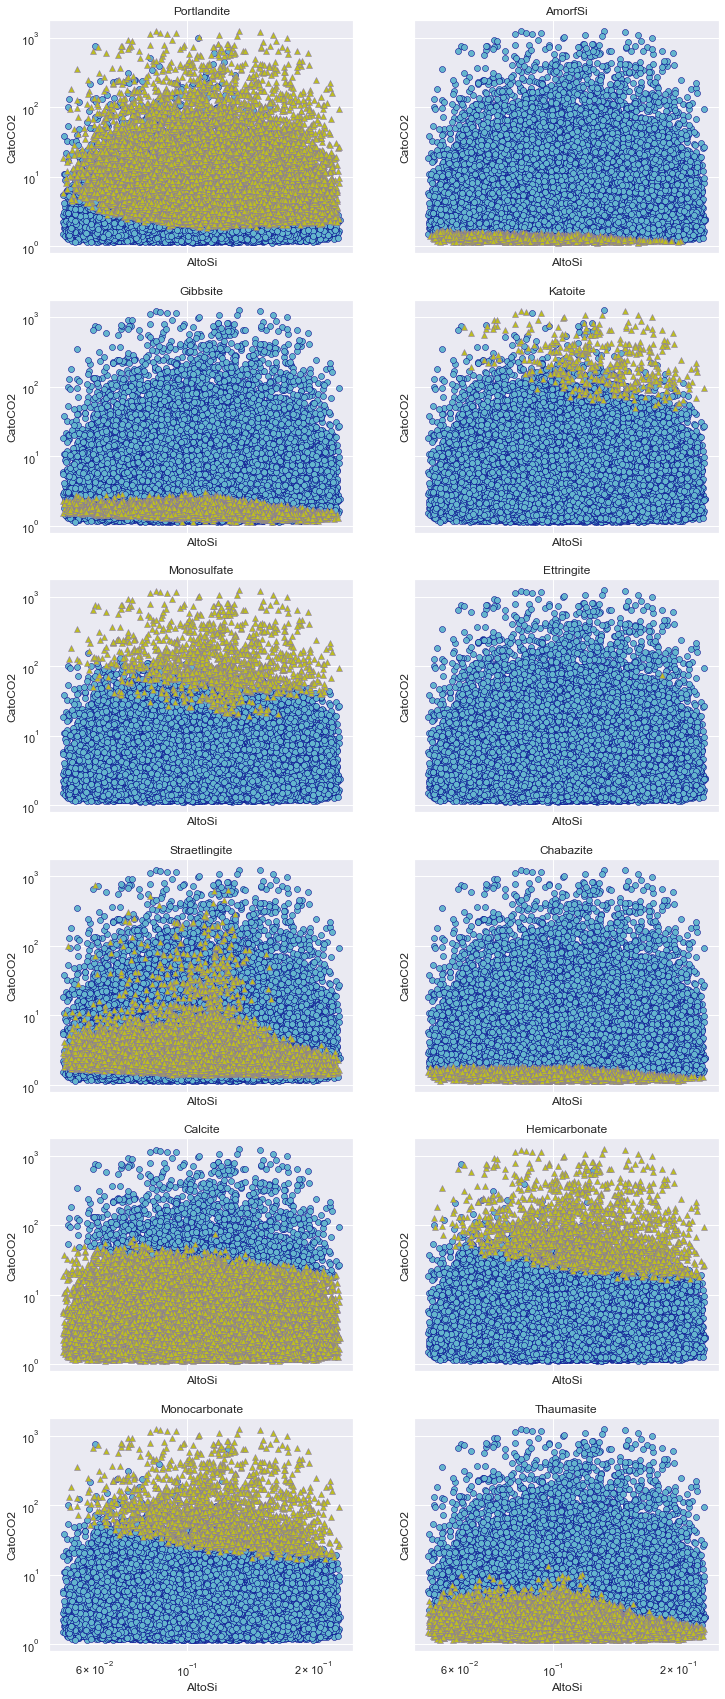

In [72]:
fig, ax =plt.subplots(6,2,figsize=(12,30),sharex=True, sharey=True)

for n,mineral in enumerate(pureMinerals):
    i = n//2
    j = n%2
  
    df1 = data[data[mineral]>0]
    df2 = data[data[mineral]<=0]
    col1 = 'AltoSi'
    col2 = 'CatoCO2'
    #x1= np.linspace(0.0,0.9,30);
    #y1 = 0+0.67*x1
    ax[i,j].plot(df2[col1].values,df2[col2].values,'bo',markerfacecolor = 'c',markeredgecolor ='darkblue',markeredgewidth=0.5,label='with nAmor-Sl')
    ax[i,j].plot(df1[col1].values,df1[col2].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='m',markeredgewidth=0.5,label='no nAmor-Sl')
    #ax.plot(x1,y1,'r-',lw=2,label ='Line 1')
    #ax.legend (loc='best',ncol=5)           
    ax[i,j].set_xscale('log')
    ax[i,j].set_yscale('log')
    #ax.set_ylim(0,2.2)
    #ax.text(0.05, 0.3, 'Above the line no Amor-Si',fontsize = 20,color = 'tab:orange')
    #ax.text(0.6, 0.20, 'Below the line with Amor-Si',fontsize = 20,color = 'k')
    ax[i,j].set_title(mineral)
    ax[i,j].set_xlabel(col1)
    ax[i,j].set_ylabel(col2)      


In [47]:
data.columns

Index(['T', 'CaO', 'SiO2', 'Al2O3', 'SO3', 'K2O', 'CO2', 'H2O', 'pH',
       'MassWater', 'Ca_aq', 'Si_aq', 'Al_aq', 'S_aq', 'K_aq', 'C_aq', 'O_aq',
       'H_aq', 'Ca_s', 'Si_s', 'Al_s', 'S_s', 'K_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Gibbsite', 'Katoite', 'Monosulfate',
       'Gypsum', 'Ettringite', 'Straetlingite', 'Chabazite', 'Calcite',
       'Hemicarbonate', 'Monocarbonate', 'Thaumasite', 'mETss', 'Al_ET_ss',
       'Ca_ET_ss', 'S_ET_ss', 'C_ET_ss', 'H2O_ET_ss', 'mCSHQ', 'Ca_ss',
       'Si_ss', 'K_ss', 'H2O_ss', 'V_s', 'Gel_water', 'CatoSi', 'AltoCO2'],
      dtype='object')

In [75]:
final_stat =pd.DataFrame()

for n,mineral in enumerate(pureMinerals):
    df1 = data[data[mineral]>0]
    dft= df1.describe().T
    dft['mineral'] = 'with ' + mineral
    if len(final_stat)==0:
        final_stat = dft
    else:
        final_stat = pd.concat([final_stat,dft],axis=0)
    df2 = data[data[mineral]<=0]
    dft= df2.describe().T
    dft['mineral'] = 'no ' + mineral
    final_stat = pd.concat([final_stat,dft],axis=0)
        
        
    

In [77]:
final_stat.to_csv('final_stat.csv')

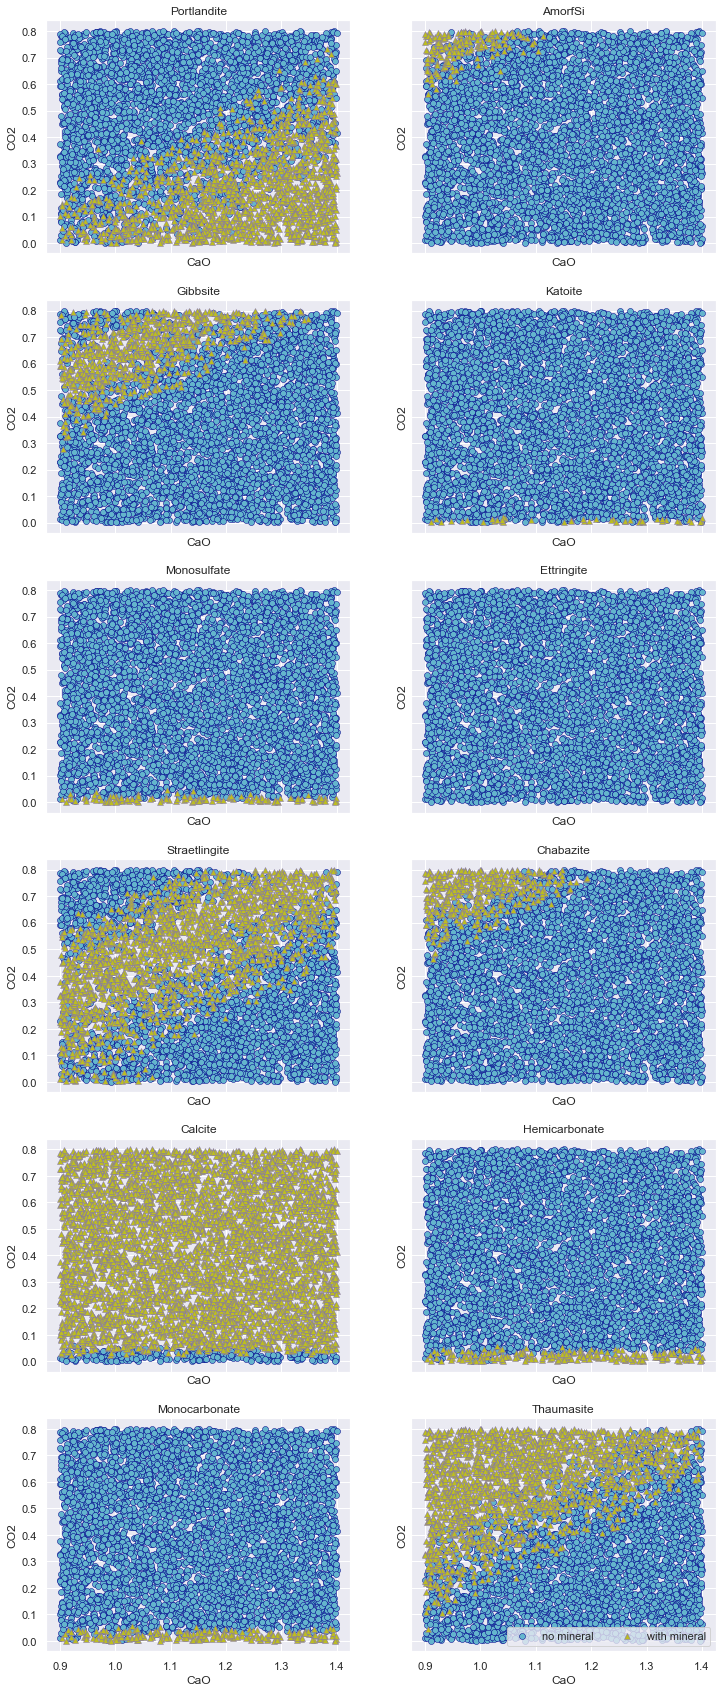

In [54]:
fig, ax =plt.subplots(6,2,figsize=(12,30),sharex=True, sharey=True)

for n,mineral in enumerate(pureMinerals):
    i = n//2
    j = n%2
  
    df1 = data[data[mineral]>0]
    df2 = data[data[mineral]<=0]
    col1 = 'CaO'
    col2 = 'CO2'
    #x1= np.linspace(0.0,0.9,30);
    #y1 = 0+0.67*x1
    ax[i,j].plot(df2[col1].values,df2[col2].values,'bo',markerfacecolor = 'c',markeredgecolor ='darkblue',markeredgewidth=0.5,label='no mineral')
    ax[i,j].plot(df1[col1].values,df1[col2].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='m',markeredgewidth=0.5,label='with mineral')
    #ax.plot(x1,y1,'r-',lw=2,label ='Line 1')
    #ax.set_xlim(0,0.9)
    #ax.set_ylim(0,2.2)
    #ax.text(0.05, 0.3, 'Above the line no Amor-Si',fontsize = 20,color = 'tab:orange')
    #ax.text(0.6, 0.20, 'Below the line with Amor-Si',fontsize = 20,color = 'k')
    ax[i,j].set_title(mineral)
    ax[i,j].set_xlabel(col1)
    ax[i,j].set_ylabel(col2)      
ax[5,1].legend (loc='best',ncol=5)           


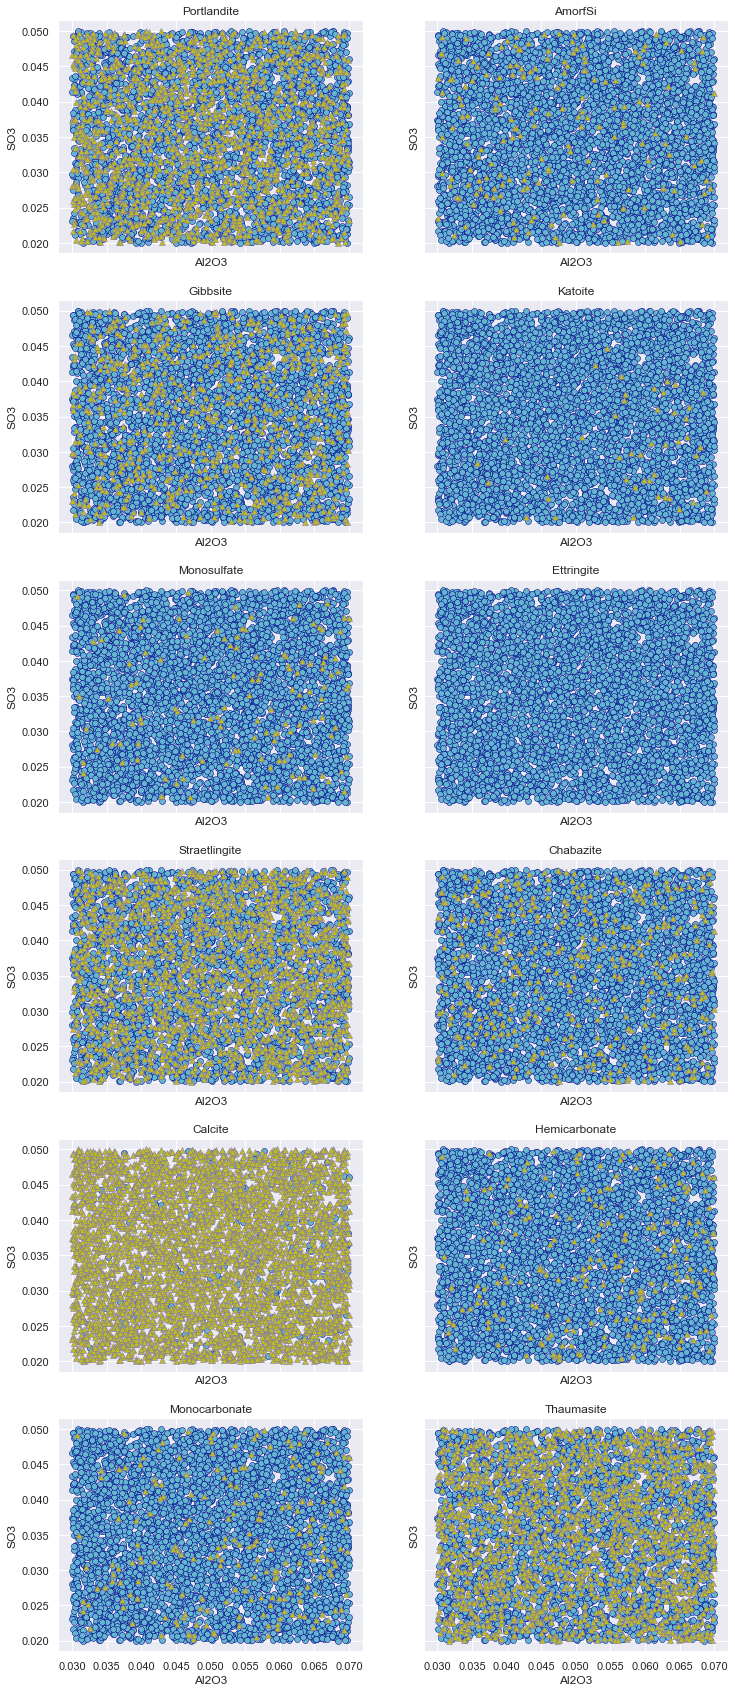

In [51]:
fig, ax =plt.subplots(6,2,figsize=(12,30),sharex=True, sharey=True)

for n,mineral in enumerate(pureMinerals):
    i = n//2
    j = n%2
  
    df1 = data[data[mineral]>0]
    df2 = data[data[mineral]<=0]
    col1 = 'Al2O3'
    col2 = 'SO3'
    #x1= np.linspace(0.0,0.9,30);
    #y1 = 0+0.67*x1
    ax[i,j].plot(df2[col1].values,df2[col2].values,'bo',markerfacecolor = 'c',markeredgecolor ='darkblue',markeredgewidth=0.5,label='with nAmor-Sl')
    ax[i,j].plot(df1[col1].values,df1[col2].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='m',markeredgewidth=0.5,label='no nAmor-Sl')
    #ax.plot(x1,y1,'r-',lw=2,label ='Line 1')
    #ax.legend (loc='best',ncol=5)           
    #ax.set_xlim(0,0.9)
    #ax.set_ylim(0,2.2)
    #ax.text(0.05, 0.3, 'Above the line no Amor-Si',fontsize = 20,color = 'tab:orange')
    #ax.text(0.6, 0.20, 'Below the line with Amor-Si',fontsize = 20,color = 'k')
    ax[i,j].set_title(mineral)
    ax[i,j].set_xlabel(col1)
    ax[i,j].set_ylabel(col2)        
    
    

In [ ]:
fig, ax =plt.subplots(figsize=(12,8))
df1 = data5k[data5k['nAmor-Sl']<=0.001]  # no nAmor-Sl
df2 = data5k[data5k['nAmor-Sl']>0.001]   # with no nAmor-Sl

#df2 = data5k[data5k['nPortlandite']<0.01]
#df3 = data5k[(data5k['nPortlandite']>=0.01) & data5k['pH']<=9.45]
## Fitting the boundary seperating Amor-S1           
x1= np.linspace(0.0,0.9,30);
y1 = 0+0.67*x1
ax.plot(df2['b(SiO2)'].values,df2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='darkblue',markeredgewidth=0.5,label='with nAmor-Sl')
ax.plot(df1['b(SiO2)'].values,df1['b(CaO)'].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='m',markeredgewidth=0.5,label='no nAmor-Sl')
ax.plot(x1,y1,'r-',lw=2,label ='Line 1')
ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)
ax.text(0.05, 0.3, 'Above the line no Amor-Si',fontsize = 20,color = 'tab:orange')
ax.text(0.6, 0.20, 'Below the line with Amor-Si',fontsize = 20,color = 'k')

ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')


# Determine the second line

In [ ]:
fig, ax =plt.subplots(figsize=(12,8))
df1 = data5k[data5k['nPortlandite']<=0.001]  # no Portlandite
df2 = data5k[data5k['nPortlandite']>0.001]   # with no Portlandite

## Fitting the line           
x2= np.linspace(0.0,0.9,30);
y2 = 0+1.60*x2
ax.plot(df2['b(SiO2)'].values,df2['b(CaO)'].values,'bo',markerfacecolor = '#0DFFFF',markeredgecolor ='darkblue',markeredgewidth=0.5,label='with Portlandite')
ax.plot(df1['b(SiO2)'].values,df1['b(CaO)'].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='m',markeredgewidth=0.5,label='no Portlandite')

#ax.plot(df3['b(SiO2)'].values,df3['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='no Amor-S1')
#ax.plot(group3['b(SiO2)'].values,group3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group3')
ax.plot(x2,y2,'y-',lw=3,label ='Line 2')
ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)
ax.text(0.05, 0.8, 'Above the line with Portlandite',fontsize = 20,color = 'k')
ax.text(0.4, 0.50, 'Below the line no Portlandite',fontsize = 20,color = 'k')

ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')

## Put the three zones together

In [ ]:
fig, ax =plt.subplots(figsize=(12,8))
df1 = data5k[data5k['nPortlandite']<=0.001]  # no Portlandite
df2 = data5k[data5k['nPortlandite']>0.001]   # with no Portlandite
df3 = data5k[data5k['nAmor-Sl']>0.001]   # with nAmor-Sl

#df2 = data5k[data5k['nPortlandite']<0.01]
#df3 = data5k[(data5k['nPortlandite']>=0.01) & data5k['pH']<=9.45]
## Fitting the boundary seperating Amor-S1           
x1= np.linspace(0.0,0.9,30);
y1 = 0+0.67*x1
## Fitting the line           
x2= np.linspace(0.0,0.9,30);
y2 = 0+1.60*x2
ax.plot(df2['b(SiO2)'].values,df2['b(CaO)'].values,'bo',markerfacecolor = '#0DFFFF',markeredgecolor ='darkblue',markeredgewidth=0.5,label='with Portlandite')
ax.plot(df1['b(SiO2)'].values,df1['b(CaO)'].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='m',markeredgewidth=0.5,label='no Portlandite')

ax.plot(df3['b(SiO2)'].values,df3['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='with Amor-S1')
#ax.plot(group3['b(SiO2)'].values,group3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group3')
ax.plot(x2,y2,'y-',lw=3,label ='Line 2')
ax.plot(x1,y1,'r-',lw=2,label ='Line 1')
ax.legend (loc='best',ncol=5)           

ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)
ax.text(0.05, 0.8, 'Above the line no Amor-Si, with Portlandite',fontsize = 20,color = 'k')
ax.text(0.4, 0.50, 'no Amor-Si or Portlandite',fontsize = 20,color = 'k')
ax.text(0.35, 0.02, 'with Amor-Si no Portlandite',fontsize = 20,color = 'k')

ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')

## Calculate the ratio of CaO to SiO2

## Put all togehter

In [ ]:

data['ratio'] = data['b(CaO)']/data['b(SiO2)']
data5k['ratio'] = data5k['b(CaO)']/data5k['b(SiO2)']

In [ ]:
#group1 = data[data['ratio']>=1.60]
#group2 = data[(data['ratio']<1.60) & (data['ratio']>0.67)]
#group3 = data[data['ratio']<=0.67]
group5k_1 = data5k[(data5k['nPortlandite']>=0.001)& (data5k['nAmor-Sl']<=0.001)]  # with Portlandite, no Amor-S1
group5k_2 = data5k[(data5k['nPortlandite']<=0.001)& (data5k['nAmor-Sl']<=0.001)]   # no Portlandite, no Amor-S1
group5k_3 = data5k[(data5k['nPortlandite']<=0.001)& (data5k['nAmor-Sl']>=0.001)]    # no Portlandite, with Amor-S1

In [ ]:
print(group5k_1['ratio'].max(),group5k_1['ratio'].min())  # with Portlandite, no Amor-S1
group1_low=group5k_1['ratio'].min()

In [ ]:
print(group5k_2['ratio'].max(),group5k_2['ratio'].min())   # no Portlandite, no Amor-S1

group2_upper=group5k_2['ratio'].max()
group2_low =group5k_2['ratio'].min()   # no Portlandite, no Amor-S1


In [ ]:
print(group5k_3['ratio'].max(),group5k_3['ratio'].min()) # no Portlandite, with Amor-S1
group3_upper= group5k_3['ratio'].max()

In [ ]:
## Devided 3 groups which are based on the Data distribution, particularly pH distribution
# ratio of 1.65 is based on 500-dataset. it seems that 1.60 is better based on 5K-dataset.
#This suggests that more data near to the boundary, more accurate the line can be determined
group1 = data[data['ratio']>=group1_low]  # with Portlandite, no Amor-S1
group2 = data[(data['ratio']<=group2_upper) & (data['ratio']>=group2_low)]  # no Portlandite, no Amor-S1
group3 = data[data['ratio']<=group3_upper]     # no Portlandite, with Amor-S1
group5k1 = data5k[data5k['ratio']>=group1_low]  # with Portlandite, no Amor-S1
group5k2 = data5k[(group2_low<=data5k['ratio']) & (data5k['ratio']<=group2_upper)]  # no Portlandite, no Amor-S1
group5k3 = data5k[data5k['ratio']<=group3_upper]    # no Portlandite, with Amor-S1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
### Output the trainning dataset for dataset5K
group1_XY_train,group1_XY_test = train_test_split(group5k1.values,test_size=0.2, train_size=0.8,shuffle=True)
group2_XY_train,group2_XY_test = train_test_split(group5k2.values,test_size=0.2, train_size=0.8,shuffle=True)
group3_XY_train,group3_XY_test = train_test_split(group5k3.values,test_size=0.2, train_size=0.8,shuffle=True)
test_XY=np.concatenate((group1_XY_test,group2_XY_test,group3_XY_test))
### Save the data to local drive
testDF = pd.DataFrame(test_XY,columns=data.columns)
group1DF_train = pd.DataFrame(group1_XY_train,columns=data.columns)
group2DF_train = pd.DataFrame(group2_XY_train,columns=data.columns)
group3DF_train = pd.DataFrame(group3_XY_train,columns=data.columns)


## exclude the ratio column
testDF.loc[:,testDF.columns!='ratio'].to_csv('dataset5K_test.csv',index=False)
group1DF_train.loc[:,group1DF_train.columns!='ratio'].to_csv('Group5K1_trainning_dataset.csv',index=False)
group2DF_train.loc[:,group2DF_train.columns!='ratio'].to_csv('Group5K2_trainning_dataset.csv',index=False)
group3DF_train.loc[:,group3DF_train.columns!='ratio'].to_csv('Group5K3_trainning_dataset.csv',index=False)




In [ ]:
### This dataset will be saved for testing the models


In [ ]:
group1_XY_train,group1_XY_test = train_test_split(group1.values,test_size=0.2, train_size=0.8,shuffle=True)
group2_XY_train,group2_XY_test = train_test_split(group2.values,test_size=0.2, train_size=0.8,shuffle=True)
group3_XY_train,group3_XY_test = train_test_split(group3.values,test_size=0.2, train_size=0.8,shuffle=True)

test_XY=np.concatenate((group1_XY_test,group2_XY_test,group3_XY_test))
### Save the data to local drive
testDF = pd.DataFrame(test_XY,columns=data.columns)
group1DF_train = pd.DataFrame(group1_XY_train,columns=data.columns)
group2DF_train = pd.DataFrame(group2_XY_train,columns=data.columns)
group3DF_train = pd.DataFrame(group3_XY_train,columns=data.columns)
## exclude the ratio column
testDF.loc[:,testDF.columns!='ratio'].to_csv('dataset5H_test.csv',index=False)
group1DF_train.loc[:,group1DF_train.columns!='ratio'].to_csv('Group5H1_trainning_dataset.csv',index=False)
group2DF_train.loc[:,group2DF_train.columns!='ratio'].to_csv('Group5H2_trainning_dataset.csv',index=False)
group3DF_train.loc[:,group3DF_train.columns!='ratio'].to_csv('Group5H3_trainning_dataset.csv',index=False)


In [ ]:
### Visualizing the three groups 
fig, ax =plt.subplots(figsize=(12,8))
x1= np.linspace(0.0,0.9,30);
y1 = 0+group3_upper*x1
x2= np.linspace(0.0,0.9,30);
y2 = 0+group1_low*x2
#ax.plot(data5k['b(SiO2)'].values,data5k['b(CaO)'].values,'b.',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='data5k')
ax.plot(group5k1['b(SiO2)'].values,group5k1['b(CaO)'].values,'bo',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='group5k1')
ax.plot(group5k2['b(SiO2)'].values,group5k2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='group5k2')
ax.plot(group5k3['b(SiO2)'].values,group5k3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group5k3')

ax.plot(group1['b(SiO2)'].values,group1['b(CaO)'].values,'bo',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='group5H1')
ax.plot(group2['b(SiO2)'].values,group2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='group5H2')
ax.plot(group3['b(SiO2)'].values,group3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group5H3')
ax.plot(x1,y1,'r-',lw=2,label ='Line 1:CaO/SiO2 = '+str(group3_upper)[:5])
ax.plot(x2,y2,'y-',lw=3,label ='Line 2:CaO/SiO2 = '+str(group1_low)[:5])
ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)
ax.text(0.1, 1.25, 'no Amor-Si, with Portlandite',fontsize = 20,color = 'brown')
ax.text(0.5, 0.62, 'no Amor-Si or Portlandite',fontsize = 20,color = 'k')
ax.text(0.35, 0.02, 'with Amor-Si no Portlandite',fontsize = 20,color = 'k')


ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')

